# Sequential Feature Selection

For more usage examples, also see http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector

In [1]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn,mlxtend

Author: Sebastian Raschka

Last updated: 2022-01-06

numpy     : 1.22.0
pandas    : 1.3.5
matplotlib: 3.5.1
sklearn   : 1.0.2
mlxtend   : 0.20.0.dev0



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset Preparation

In [3]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_std, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_std) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_std) == y_test)*100)

Training accuracy: 98.59154929577466
Test accuracy: 94.44444444444444


## Selecting the best 5 features

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


sfs1 = SFS(model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X_train_std, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.7s finished

[2022-01-06 14:13:58] Features: 1/5 -- score: 0.7812807881773399[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-01-06 14:13:58] Features: 2/5 -- score: 0.9147783251231527[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-01-06 14:13:58] Features: 3/5 -- score: 0.9502463054187192[Parallel(n_jobs=-1)]: Using backend Lok

In [7]:
sfs1.k_feature_idx_

(0, 6, 9, 10, 12)

In [8]:
# you can also use sfs1.k_feature_names_ if you fit the model with a pandas DataFrame

df_wine.columns[1:][list(sfs1.k_feature_idx_)]

Index(['Alcohol', 'Flavanoids', 'Color intensity', 'Hue', 'Proline'], dtype='object')

In [9]:
X_train_sele = sfs1.transform(X_train_std)
X_test_sele = sfs1.transform(X_test_std)

model.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_sele) == y_test)*100)

Training accuracy: 99.29577464788733
Test accuracy: 97.22222222222221


## Inspecting the results

In [10]:
sfs1.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.72413793, 0.89655172, 0.85714286, 0.71428571, 0.71428571]),
  'avg_score': 0.7812807881773399,
  'feature_names': ('6',)},
 2: {'feature_idx': (6, 10),
  'cv_scores': array([0.96551724, 0.96551724, 0.85714286, 0.89285714, 0.89285714]),
  'avg_score': 0.9147783251231527,
  'feature_names': ('6', '10')},
 3: {'feature_idx': (6, 10, 12),
  'cv_scores': array([0.96551724, 1.        , 0.85714286, 0.96428571, 0.96428571]),
  'avg_score': 0.9502463054187192,
  'feature_names': ('6', '10', '12')},
 4: {'feature_idx': (6, 9, 10, 12),
  'cv_scores': array([1.        , 1.        , 0.89285714, 1.        , 1.        ]),
  'avg_score': 0.9785714285714284,
  'feature_names': ('6', '9', '10', '12')},
 5: {'feature_idx': (0, 6, 9, 10, 12),
  'cv_scores': array([1.        , 1.        , 0.96428571, 1.        , 1.        ]),
  'avg_score': 0.9928571428571429,
  'feature_names': ('0', '6', '9', '10', '12')}}

In [11]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict

{1: {'feature_idx': (6,),
  'cv_scores': array([0.72413793, 0.89655172, 0.85714286, 0.71428571, 0.71428571]),
  'avg_score': 0.7812807881773399,
  'feature_names': ('6',),
  'ci_bound': 0.10166712610426668,
  'std_dev': 0.07910047807554303,
  'std_err': 0.039550239037771516},
 2: {'feature_idx': (6, 10),
  'cv_scores': array([0.96551724, 0.96551724, 0.85714286, 0.89285714, 0.89285714]),
  'avg_score': 0.9147783251231527,
  'feature_names': ('6', '10'),
  'ci_bound': 0.055823068137204036,
  'std_dev': 0.043432243503843296,
  'std_err': 0.021716121751921644},
 3: {'feature_idx': (6, 10, 12),
  'cv_scores': array([0.96551724, 1.        , 0.85714286, 0.96428571, 0.96428571]),
  'avg_score': 0.9502463054187192,
  'feature_names': ('6', '10', '12'),
  'ci_bound': 0.062362690699099374,
  'std_dev': 0.0485202920294701,
  'std_err': 0.02426014601473505},
 4: {'feature_idx': (6, 9, 10, 12),
  'cv_scores': array([1.        , 1.        , 0.89285714, 1.        , 1.        ]),
  'avg_score': 0.97857

In [12]:
df = pd.DataFrame.from_dict(metric_dict).T
df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7241379310344828, 0.896551724137931, 0.8571...",0.781281,"(6,)",0.101667,0.0791,0.03955
2,"(6, 10)","[0.9655172413793104, 0.9655172413793104, 0.857...",0.914778,"(6, 10)",0.055823,0.043432,0.021716
3,"(6, 10, 12)","[0.9655172413793104, 1.0, 0.8571428571428571, ...",0.950246,"(6, 10, 12)",0.062363,0.04852,0.02426
4,"(6, 9, 10, 12)","[1.0, 1.0, 0.8928571428571429, 1.0, 1.0]",0.978571,"(6, 9, 10, 12)",0.055084,0.042857,0.021429
5,"(0, 6, 9, 10, 12)","[1.0, 1.0, 0.9642857142857143, 1.0, 1.0]",0.992857,"(0, 6, 9, 10, 12)",0.018361,0.014286,0.007143


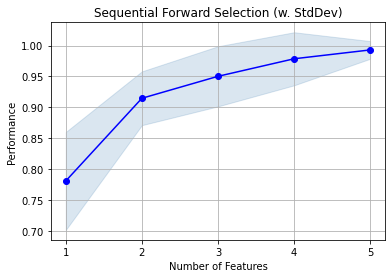

In [13]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Select the best subset of any size

In [15]:
sfs1 = SFS(model, 
           k_features="best", # or (1, 13) and then select by hand 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=5)


sfs1 = sfs1.fit(X_train_std, y_train)

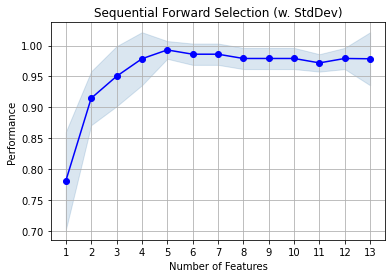

In [16]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [17]:
sfs1.k_feature_idx_

(0, 6, 9, 10, 12)

For more usage examples (including `GridSearchCV`, also see http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector

## Exhaustive Search

Always a good idea to check the number of combinations to see if it is feasible:

$$\sum_{i=1}^{m} {m \choose i}$$

$${13 \choose 1} + {13 \choose 2} + \dots + {13  \choose 13} = 8191$$

In [18]:
from mlxtend.math import num_combinations



all_comb = np.sum([num_combinations(n=X.shape[1], k=i)
                   for i in range(1, X.shape[1]+1)])

all_comb

8191

In [19]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


efs1 = EFS(model, 
           min_features=1,
           max_features=X.shape[1],
           scoring='accuracy',
           print_progress=True,
           n_jobs=-1,
           cv=5)

efs1 = efs1.fit(X_train_std, y_train)

Features: 8191/8191

In [20]:
efs1.best_idx_

(0, 6, 9, 10, 12)

## Sequential Feature Selection in Scikit-learn

- Simpler interface without that many bells and whistles
- Use this if you are interested in a specific feature size and don't want to use floating variants

In [21]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='accuracy',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train_std, y_train)

In [22]:
np.arange(X.shape[1])[sfs2.support_]

array([ 0,  6,  9, 10, 12])